In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Problem 1

<ipython-input-2-01273bcadef1>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters, signalcenters, Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

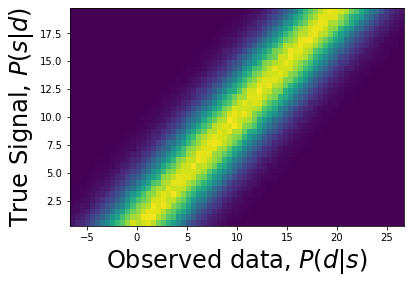

In [2]:
fig, ax = plt.subplots(1, 1)

bkgd = stats.norm.rvs(loc = 0, scale = 3, size = 1000000)
signal = stats.uniform.rvs (loc = 0, scale = 20, size = 1000000)

data = bkgd + signal
signaledges = np.linspace(0, 20, 40)
dataedges = np.linspace(-7, 27, 68)

#Psd stores an array of data to signal (i.e. an 67 long array of arrays of length 39)
#Psd[40] is a vertical slice at P(d|s) of 13 (from -7 + 40/2)
Psd, temp, temp2 = np.histogram2d(data,signal, bins = [dataedges, signaledges], density = True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T)
plt.ylabel('True Signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

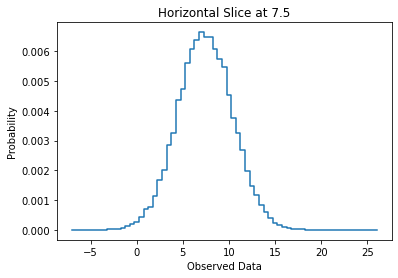

In [3]:
fig, ax = plt.subplots(1, 1)

def hor_slice(x):
    num = []
    for i in range(len(Psd)):
        num.append(Psd[i][x])
    return num

lin = np.arange(-7,26.5,.5)
ax.set_title("Horizontal Slice at 7.5")
ax.set_xlabel("Observed Data")
ax.set_ylabel("Probability")
ax.step(lin, hor_slice(15), where = 'mid')

Slice of P(d|s) at a true signal of 7.5 shown above. This gives what the observed histogram would look like if we had a signal of 7.5 along with the background. We could compare this to what was actually observed when data was taken to see how well the two plots overlapped and determine if the signal was close to 7.5.

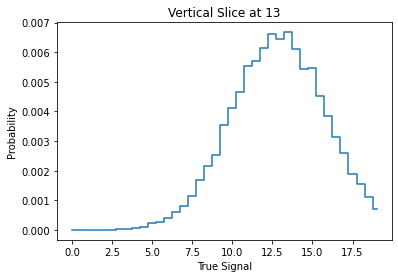

In [4]:
fig, ax = plt.subplots(1, 1)

# To convert x to an observed signal value use Obs = -7 + x/2
def ver_slice(x):
    return Psd[x]

lin = np.arange(0,19.5, .5)
ax.set_title("Vertical Slice at 13")
ax.set_xlabel("True Signal")
ax.set_ylabel("Probability")
ax.step(lin, ver_slice(40), where = 'mid')

Slice of P(s|d) at an observed signal of 13 shown above. This tells what the probability of the signal being a value x on the X-axis of the above plot would be if we observed data with peak of 13.

# Problem 2

<ipython-input-5-91010d7d9852>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters, signalcenters, Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

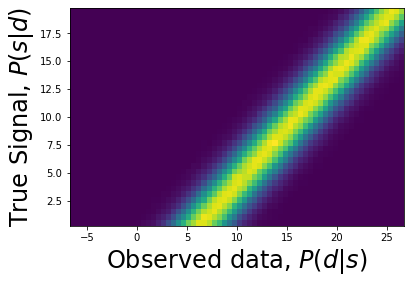

In [5]:
fig, ax = plt.subplots(1, 1)

bkgd = stats.norm.rvs(loc = 6, scale = 2, size = 1000000)
signal = stats.uniform.rvs (loc = 0, scale = 20, size = 1000000)

data = bkgd + signal
signaledges = np.linspace(0, 20, 40)
dataedges = np.linspace(-7, 27, 68)

#Psd stores an array of data to signal (i.e. an 67 long array of arrays of length 39)
#Psd[40] is a vertical slice at P(d|s) of 13 (from -7 + 40/2)
Psd, temp, temp2 = np.histogram2d(data,signal, bins = [dataedges, signaledges], density = True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T)
plt.ylabel('True Signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

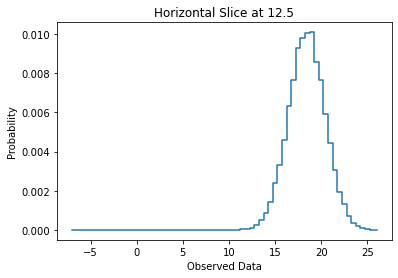

In [6]:
fig, ax = plt.subplots(1, 1)

def hor_slice(x):
    num = []
    for i in range(len(Psd)):
        num.append(Psd[i][x])
    return num

lin = np.arange(-7,26.5,.5)
ax.set_title("Horizontal Slice at 12.5")
ax.set_xlabel("Observed Data")
ax.set_ylabel("Probability")
ax.step(lin, hor_slice(25), where = 'mid')

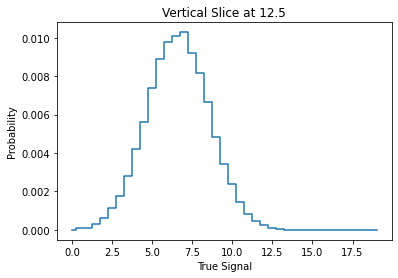

In [7]:
fig, ax = plt.subplots(1, 1)

# To convert x to an observed signal value use Obs = -7 + x/2
def ver_slice(x):
    return Psd[x]

lin = np.arange(0,19.5, .5)
ax.set_title("Vertical Slice at 12.5")
ax.set_xlabel("True Signal")
ax.set_ylabel("Probability")
ax.step(lin, ver_slice(39), where = 'mid')

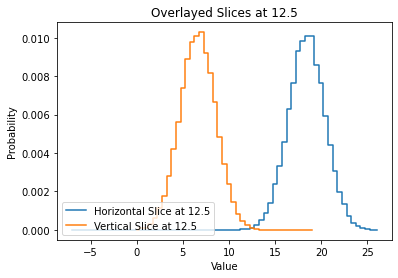

In [8]:
fig, ax = plt.subplots(1, 1)




lin = np.arange(-7,26.5,.5)
ax.step(lin, hor_slice(25), where = 'mid')
lin = np.arange(0,19.5, .5)
ax.step(lin, ver_slice(39), where = 'mid')

ax.set_title("Overlayed Slices at 12.5")
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax.legend(["Horizontal Slice at 12.5", "Vertical Slice at 12.5"], loc = 'lower left')